In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df=pd.read_excel("C:\Raju\cust_data.xlsx")
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [3]:
#Only the orders column is needed.
df1=df[["Orders"]]
df1.head()

,Orders
0,7
1,0
2,7
3,0
4,10


In [4]:
df1.describe()

,Orders
count,30000.000000
mean,4.169800
std,3.590311
min,0.000000
25%,1.000000
50%,4.000000
75%,7.000000
max,12.000000


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Orders  30000 non-null  int64
dtypes: int64(1)
memory usage: 234.5 KB


In [6]:
print(len(df1))

30000


In [7]:
df1=df1.dropna()
print(len(df1))

30000


In [8]:
df1.head()

,Orders
0,7
1,0
2,7
3,0
4,10


([<matplotlib.axis.XTick at 0x1b57f6f2e20>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

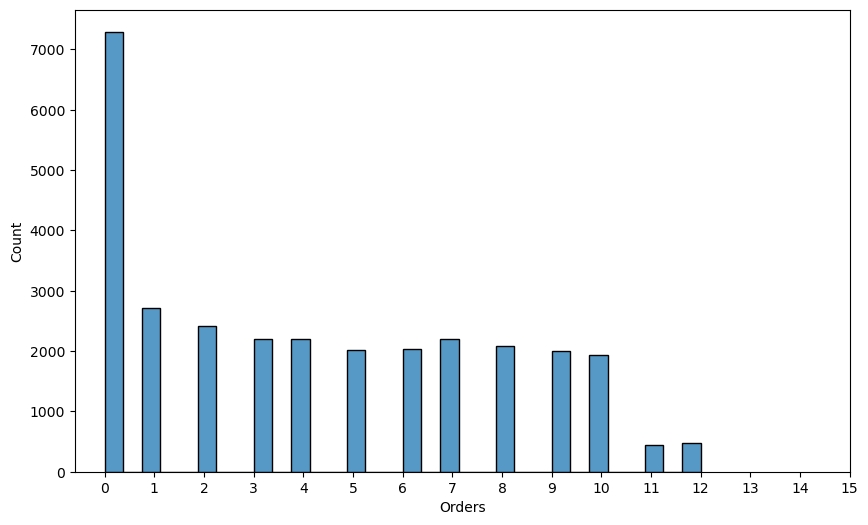

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(df1["Orders"])
plt.xticks(range(16))

In [10]:
grp=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(df1)
    grp.append(km.inertia_)
print(grp)

[386697.03879998653, 84897.58961765707, 36647.696892134045, 20133.07105550253, 12531.018845310933, 9210.626335171464, 6057.3139526043515, 4777.019674675174, 3292.8497317489837, 2222.0403079095445]


([<matplotlib.axis.XTick at 0x1b57e5a86d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

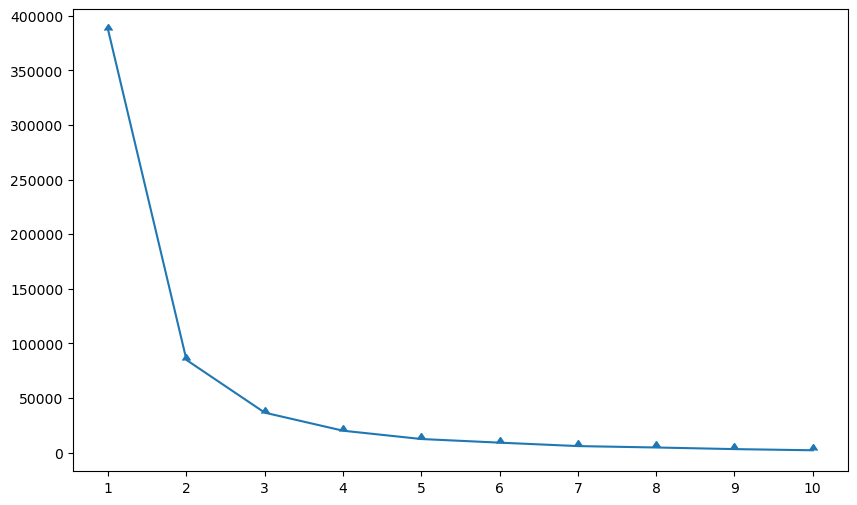

In [11]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),grp,marker=10)
plt.xticks(ticks=range(1,11,1))

In [12]:
km1=KMeans(n_clusters=4,random_state=42)
km1.fit(df1)
y=km1.predict(df1)
df1["Groups"]=y

([<matplotlib.axis.XTick at 0x1b57d82e0d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

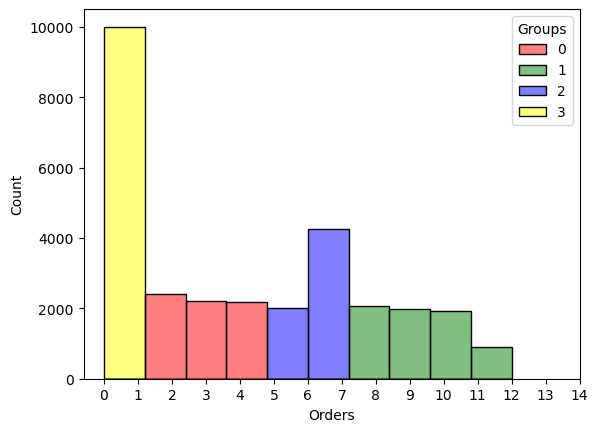

In [13]:
sns.histplot(x=df1["Orders"],hue="Groups",palette=["red","green","blue","yellow"],legend="full",data=df1,bins=10)
plt.xticks(ticks=range(0,15,1))

In [14]:
count=[]
for i in range(0,4):
    group=df1[df1["Groups"]==i]
    t=len(group)
    count.append(t)
print(count)

[6813, 6921, 6256, 10010]


In [15]:
#Red- 22.71% people place around 1-5 orders.

#Green- 23.07% people place around 7-12 orders.

#Blue-20.85% people place around 5-7 orders.

#Yellow- 33.36% people hardly places any order, but still searches for products in the website.


In [16]:
from sklearn.metrics import silhouette_score
%matplotlib inline
df1_new = df1[np.isfinite(df1).all(1)]
q=silhouette_score(df1_new,y)
print(q)

0.7507015435086702
